In [1]:
import os
import numpy as np
import Cell_BLAST as cb
import utils
cb.config.RANDOM_SEED = 0
cb.config.N_JOBS = 4
fixed_model_kwargs = dict(
    latent_dim=10, cat_dim=20,
    epoch=500, patience=20
)

---
# Human
### Vento-Tormo_10x

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,cell_ontology_class,cell_ontology_id,cell_type1,cluster,dataset_name,donor,organ,organism,platform,region,sample
FCA7167222_TCTGGAACAGAGTGTG,stromal cell,CL:0000499,dS1,0.0,Vento-Tormo_10x,F20,Placenta,Homo sapiens,10x,Decidua,FCA7167222
FCA7167226_GGAACTTGTCTAAACC,stromal cell,CL:0000499,dS1,0.0,Vento-Tormo_10x,F20,Placenta,Homo sapiens,10x,Decidua,FCA7167226
FCA7196225_ACTATCTCATTCACTT,stromal cell,CL:0000499,dS1,0.0,Vento-Tormo_10x,F27,Placenta,Homo sapiens,10x,Decidua,FCA7196225
FCA7474063_AAAGCAAGTCAAACTC,stromal cell,CL:0000499,dS1,0.0,Vento-Tormo_10x,F36,Placenta,Homo sapiens,10x,Decidua,FCA7474063
FCA7196219_CTCGAAAGTTAAGTAG,stromal cell,CL:0000499,dS1,0.0,Vento-Tormo_10x,F25,Placenta,Homo sapiens,10x,Decidua,FCA7196219


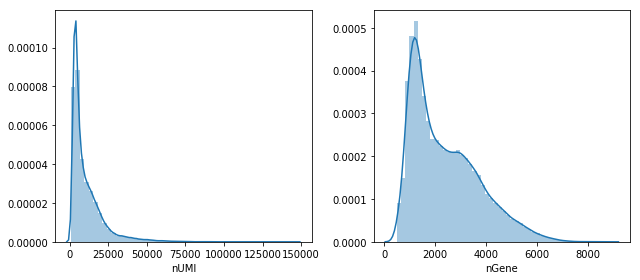

In [2]:
vento_tormo_10x = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Vento-Tormo_10x/data.h5")
utils.peek(vento_tormo_10x, "Vento-Tormo_10x")
vento_tormo_10x = vento_tormo_10x.normalize()
vento_tormo_10x.obs.head()

In [3]:
vento_tormo_10x.uns["seurat_genes"].size

963

In [4]:
opt_model_kwargs = dict(batch_effect="donor")
                       #prob_module_kwargs=dict(lambda_reg=0.01),
                       #h_dim=512)
vento_tormo_10x_model = cb.directi.fit_DIRECTi(
    vento_tormo_10x, vento_tormo_10x.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Vento-Tormo_10x/model_0"
)
vento_tormo_10x.latent = vento_tormo_10x_model.inference(vento_tormo_10x)

[DIRECTi epoch 0] train=1.679, val=1.206, time elapsed=7.2s Regular save...
[DIRECTi epoch 1] train=1.026, val=1.008, time elapsed=6.2s
[DIRECTi epoch 2] train=0.980, val=0.970, time elapsed=6.4s
[DIRECTi epoch 3] train=0.953, val=0.951, time elapsed=6.5s
[DIRECTi epoch 4] train=0.939, val=0.939, time elapsed=6.6s
[DIRECTi epoch 5] train=0.930, val=0.930, time elapsed=6.4s
[DIRECTi epoch 6] train=0.923, val=0.925, time elapsed=6.4s
[DIRECTi epoch 7] train=0.917, val=0.918, time elapsed=6.6s
[DIRECTi epoch 8] train=0.914, val=0.917, time elapsed=6.6s
[DIRECTi epoch 9] train=0.911, val=0.913, time elapsed=6.5s
[DIRECTi epoch 10] train=0.909, val=0.912, time elapsed=6.5s Regular save...
[DIRECTi epoch 11] train=0.907, val=0.910, time elapsed=6.5s
[DIRECTi epoch 12] train=0.905, val=0.910, time elapsed=6.6s
[DIRECTi epoch 13] train=0.904, val=0.907, time elapsed=6.5s
[DIRECTi epoch 14] train=0.903, val=0.906, time elapsed=6.6s
[DIRECTi epoch 15] train=0.902, val=0.907, time elapsed=6.6s
[D

[  Info   ] Computing tSNE...


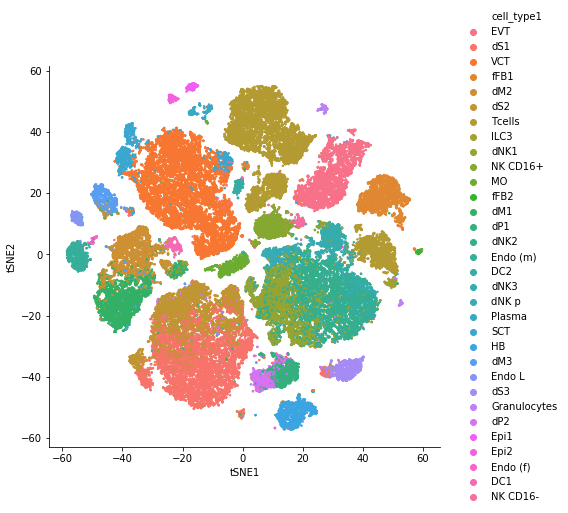

In [5]:
plot = vento_tormo_10x.visualize_latent("cell_type1")
plot.get_figure().savefig("Vento-Tormo_10x/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


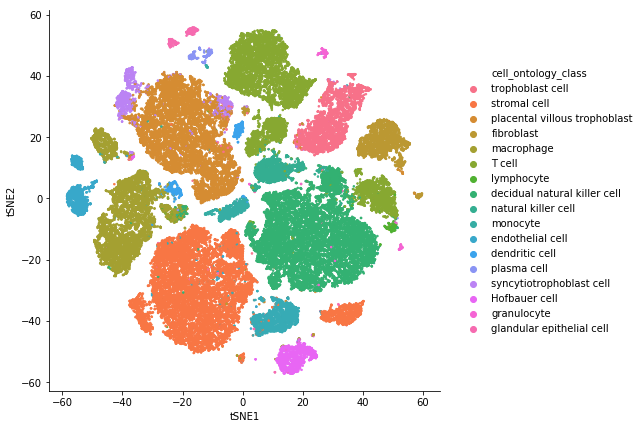

In [6]:
plot = vento_tormo_10x.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("Vento-Tormo_10x/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


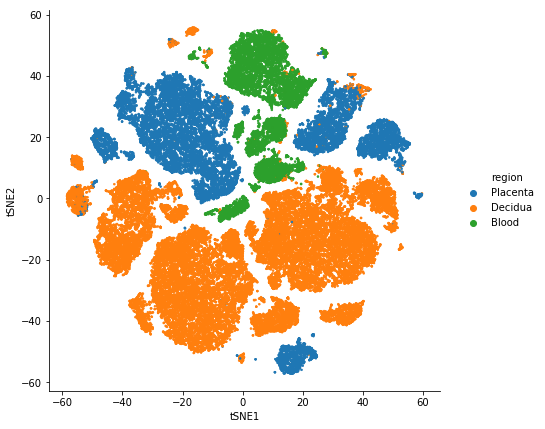

In [7]:
plot = vento_tormo_10x.visualize_latent("region")
plot.get_figure().savefig("Vento-Tormo_10x/region.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


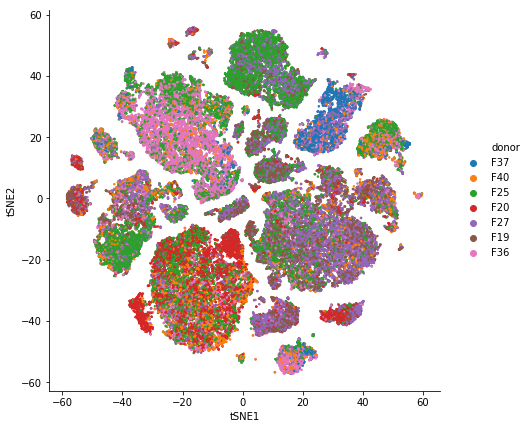

In [8]:
plot = vento_tormo_10x.visualize_latent("donor")
plot.get_figure().savefig("Vento-Tormo_10x/donor.pdf", bbox_inches="tight")

In [9]:
%%capture capio
vento_tormo_10x_models = [vento_tormo_10x_model]
#opt_model_kwargs = dict(batch_effect="donor")
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    vento_tormo_10x_models.append(cb.directi.fit_DIRECTi(
        vento_tormo_10x, vento_tormo_10x.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Vento-Tormo_10x/model_%d" % i
    ))
vento_tormo_10x_blast = cb.blast.BLAST(vento_tormo_10x_models, vento_tormo_10x, 
                                               keep_exprs=True).build_empirical()
vento_tormo_10x_blast.save("Vento-Tormo_10x")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Vento-Tormo_10x/model_1/checkpoint-71
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Vento-Tormo_10x/model_2/checkpoint-100
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Vento-Tormo_10x/model_3/checkpoint-100


In [10]:
with open("Vento-Tormo_10x/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Vento-Tormo_10x/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [11]:
utils.self_projection(vento_tormo_10x_blast, "Vento-Tormo_10x")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...


/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:313: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Coverage = 0.9941
Accuracy = 0.9865


### Vento-Tormo_Smart-seq2

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,cell_ontology_class,cell_ontology_id,cell_type1,cluster,dataset_name,donor,organ,organism,platform,region
24087_4_281,stromal cell,CL:0000499,dS1,0.0,Vento-Tormo_Smart-seq2,F13,Placenta,Homo sapiens,Smart-seq2,Decidua
23728_5_307,stromal cell,CL:0000499,dS1,0.0,Vento-Tormo_Smart-seq2,F10,Placenta,Homo sapiens,Smart-seq2,Decidua
24087_1_380,stromal cell,CL:0000499,dS1,0.0,Vento-Tormo_Smart-seq2,F13,Placenta,Homo sapiens,Smart-seq2,Decidua
23728_5_279,stromal cell,CL:0000499,dS1,0.0,Vento-Tormo_Smart-seq2,F10,Placenta,Homo sapiens,Smart-seq2,Decidua
24087_4_276,stromal cell,CL:0000499,dS1,0.0,Vento-Tormo_Smart-seq2,F13,Placenta,Homo sapiens,Smart-seq2,Decidua


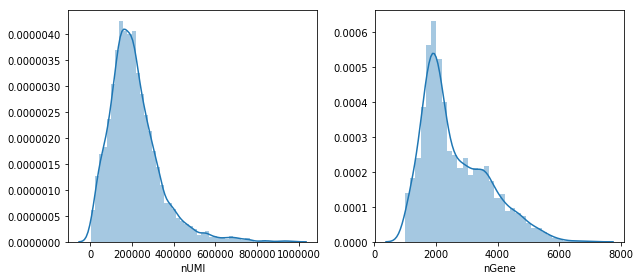

In [12]:
vento_tormo_smart_seq2 = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Vento-Tormo_Smart-seq2/data.h5")
utils.peek(vento_tormo_smart_seq2, "Vento-Tormo_Smart-seq2")
vento_tormo_smart_seq2 = vento_tormo_smart_seq2.normalize()
vento_tormo_smart_seq2.obs.head()

In [13]:
opt_model_kwargs = dict(batch_effect="donor")
vento_tormo_smart_seq2_model = cb.directi.fit_DIRECTi(
    vento_tormo_smart_seq2, vento_tormo_smart_seq2.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Vento-Tormo_Smart-seq2/model_0"
)
vento_tormo_smart_seq2.latent = vento_tormo_smart_seq2_model.inference(vento_tormo_smart_seq2)

[DIRECTi epoch 0] train=2.429, val=2.440, time elapsed=1.3s Regular save...
[DIRECTi epoch 1] train=2.419, val=2.422, time elapsed=0.5s
[DIRECTi epoch 2] train=2.391, val=2.377, time elapsed=0.5s
[DIRECTi epoch 3] train=2.057, val=1.253, time elapsed=0.5s
[DIRECTi epoch 4] train=0.958, val=1.176, time elapsed=0.5s
[DIRECTi epoch 5] train=0.917, val=1.056, time elapsed=0.5s
[DIRECTi epoch 6] train=0.917, val=0.939, time elapsed=0.5s
[DIRECTi epoch 7] train=0.913, val=0.916, time elapsed=0.5s
[DIRECTi epoch 8] train=0.884, val=0.863, time elapsed=0.5s
[DIRECTi epoch 9] train=0.863, val=0.848, time elapsed=0.5s
[DIRECTi epoch 10] train=0.855, val=0.843, time elapsed=0.5s Regular save...
[DIRECTi epoch 11] train=0.846, val=0.833, time elapsed=0.5s
[DIRECTi epoch 12] train=0.838, val=0.830, time elapsed=0.5s
[DIRECTi epoch 13] train=0.833, val=0.822, time elapsed=0.5s
[DIRECTi epoch 14] train=0.825, val=0.812, time elapsed=0.5s
[DIRECTi epoch 15] train=0.819, val=0.807, time elapsed=0.5s
[D

[  Info   ] Computing tSNE...


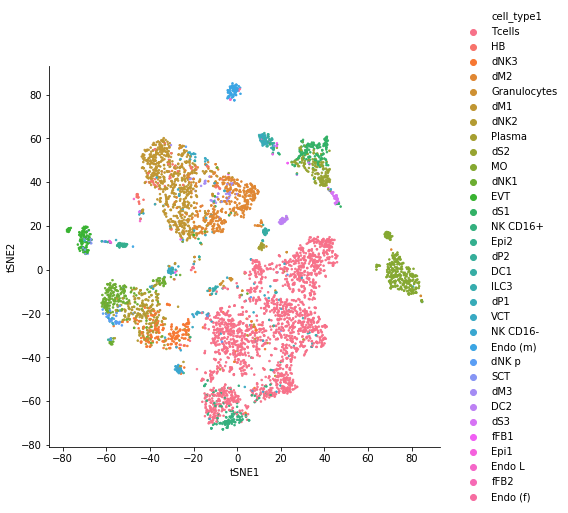

In [14]:
plot = vento_tormo_smart_seq2.visualize_latent("cell_type1")
plot.get_figure().savefig("Vento-Tormo_Smart-seq2/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


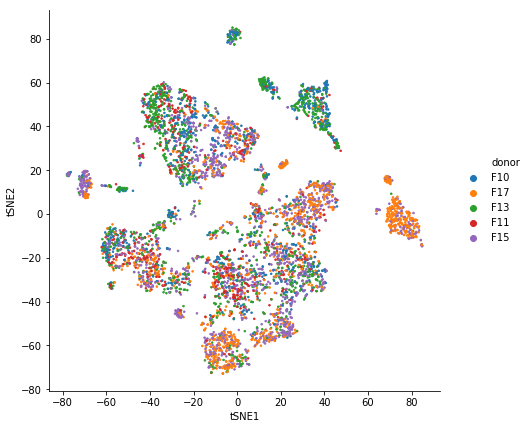

In [15]:
plot = vento_tormo_smart_seq2.visualize_latent("donor")
plot.get_figure().savefig("Vento-Tormo_Smart-seq2/donor.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


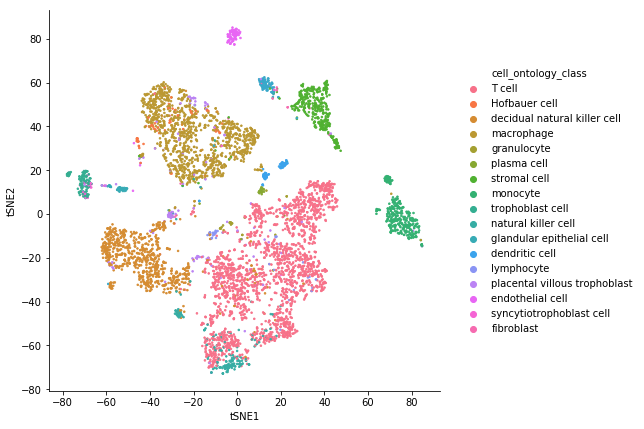

In [16]:
plot = vento_tormo_smart_seq2.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("Vento-Tormo_Smart-seq2/cell_ontology_class.pdf", bbox_inches="tight")

In [17]:
%%capture capio
vento_tormo_smart_seq2_models = [vento_tormo_smart_seq2_model]
opt_model_kwargs = dict(batch_effect="donor")
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    vento_tormo_smart_seq2_models.append(cb.directi.fit_DIRECTi(
        vento_tormo_smart_seq2, vento_tormo_smart_seq2.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Vento-Tormo_Smart-seq2/model_%d" % i
    ))
vento_tormo_smart_seq2_blast = cb.blast.BLAST(vento_tormo_smart_seq2_models, vento_tormo_smart_seq2, 
                                               keep_exprs=True).build_empirical()
vento_tormo_smart_seq2_blast.save("Vento-Tormo_Smart-seq2")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Vento-Tormo_Smart-seq2/model_1/checkpoint-102
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Vento-Tormo_Smart-seq2/model_2/checkpoint-145
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Vento-Tormo_Smart-seq2/model_3/checkpoint-82


In [18]:
with open("Vento-Tormo_Smart-seq2/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Vento-Tormo_Smart-seq2/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [19]:
utils.self_projection(vento_tormo_smart_seq2_blast, "Vento-Tormo_Smart-seq2")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9810
Accuracy = 0.9457


## Human aligned

In [20]:
if not os.path.exists("ALIGNED_Homo_sapiens_Placenta"):
    os.makedirs("ALIGNED_Homo_sapiens_Placenta")
vento_tormo_10x.obs["vento_tormo_10x_donor"] = \
    vento_tormo_10x.obs["donor"]
vento_tormo_smart_seq2.obs["vento_tormo_smart_seq2_donor"] = \
    vento_tormo_smart_seq2.obs["donor"]
human = cb.data.ExprDataSet.merge_datasets(dict(
    vento_tormo_10x=vento_tormo_10x,
    vento_tormo_smart_seq2=vento_tormo_smart_seq2
), merge_uns_slots=["seurat_genes"])

[  Info   ] Merging uns slots...
[  Info   ] Merging var data frame...
[  Info   ] Merging obs data frame...
[  Info   ] Merging expression matrix...


/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/Cell_BLAST/data.py:579: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  merged_obs = pd.concat(merged_obs)


In [21]:
human.obs.head()

,cell_ontology_class,cell_ontology_id,cell_type1,cluster,dataset_name,donor,latent_1,latent_10,latent_2,latent_3,...,latent_9,organ,organism,platform,region,sample,tSNE1,tSNE2,vento_tormo_10x_donor,vento_tormo_smart_seq2_donor
FCA7167222_TCTGGAACAGAGTGTG,stromal cell,CL:0000499,dS1,0.0,Vento-Tormo_10x,F20,-0.417149,0.427880,2.452204,0.394684,...,1.404007,Placenta,Homo sapiens,10x,Decidua,FCA7167222,-33.459602,-36.933327,F20,NaN
FCA7167226_GGAACTTGTCTAAACC,stromal cell,CL:0000499,dS1,0.0,Vento-Tormo_10x,F20,0.557792,-0.327036,1.417137,0.962591,...,1.757400,Placenta,Homo sapiens,10x,Decidua,FCA7167226,-15.459246,-45.555614,F20,NaN
FCA7196225_ACTATCTCATTCACTT,stromal cell,CL:0000499,dS1,0.0,Vento-Tormo_10x,F27,-0.021489,0.299932,1.749449,0.151687,...,1.388124,Placenta,Homo sapiens,10x,Decidua,FCA7196225,-7.126108,-19.971443,F27,NaN
FCA7474063_AAAGCAAGTCAAACTC,stromal cell,CL:0000499,dS1,0.0,Vento-Tormo_10x,F36,-0.351482,-0.254474,1.549372,1.312925,...,1.277426,Placenta,Homo sapiens,10x,Decidua,FCA7474063,-6.740014,-38.087719,F36,NaN
FCA7196219_CTCGAAAGTTAAGTAG,stromal cell,CL:0000499,dS1,0.0,Vento-Tormo_10x,F25,-0.073544,-0.227515,1.193740,0.324894,...,1.400410,Placenta,Homo sapiens,10x,Decidua,FCA7196219,-20.923590,-38.126873,F25,NaN


In [22]:
opt_model_kwargs = dict(
    batch_effect=["dataset_name", "vento_tormo_10x_donor", "vento_tormo_smart_seq2_donor"],
    #rmbatch_module=["MNNAdversarial", "Adversarial", "Adversarial", "Adversarial"],
    rmbatch_module_kwargs=dict(lambda_reg=0.002)
    #prob_module_kwargs=dict(lambda_reg=0.01)
)  # Many batch effects are being aligned, decrease regularization strength accordingly
human_model = cb.directi.fit_DIRECTi(
    human, human.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/ALIGNED_Homo_sapiens_Placenta/model_0"
)
human.latent = human_model.inference(human)

[DIRECTi epoch 0] train=1.438, val=0.931, time elapsed=10.0s Regular save...
[DIRECTi epoch 1] train=0.859, val=0.844, time elapsed=9.3s
[DIRECTi epoch 2] train=0.821, val=0.808, time elapsed=9.3s
[DIRECTi epoch 3] train=0.803, val=0.797, time elapsed=9.4s
[DIRECTi epoch 4] train=0.792, val=0.787, time elapsed=9.3s
[DIRECTi epoch 5] train=0.784, val=0.781, time elapsed=9.2s
[DIRECTi epoch 6] train=0.779, val=0.776, time elapsed=9.0s
[DIRECTi epoch 7] train=0.775, val=0.774, time elapsed=9.2s
[DIRECTi epoch 8] train=0.773, val=0.770, time elapsed=9.2s
[DIRECTi epoch 9] train=0.771, val=0.769, time elapsed=9.1s
[DIRECTi epoch 10] train=0.769, val=0.767, time elapsed=9.1s Regular save...
[DIRECTi epoch 11] train=0.768, val=0.767, time elapsed=9.1s
[DIRECTi epoch 12] train=0.767, val=0.767, time elapsed=9.2s
[DIRECTi epoch 13] train=0.766, val=0.765, time elapsed=9.1s
[DIRECTi epoch 14] train=0.765, val=0.763, time elapsed=9.1s
[DIRECTi epoch 15] train=0.764, val=0.765, time elapsed=9.1s
[

[  Info   ] Computing tSNE...


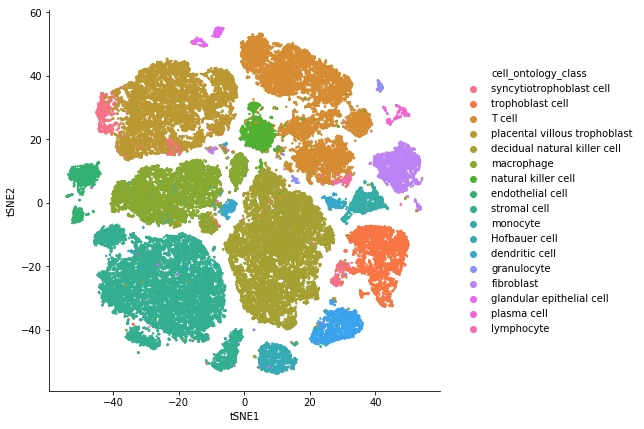

In [23]:
plot = human.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("ALIGNED_Homo_sapiens_Placenta/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


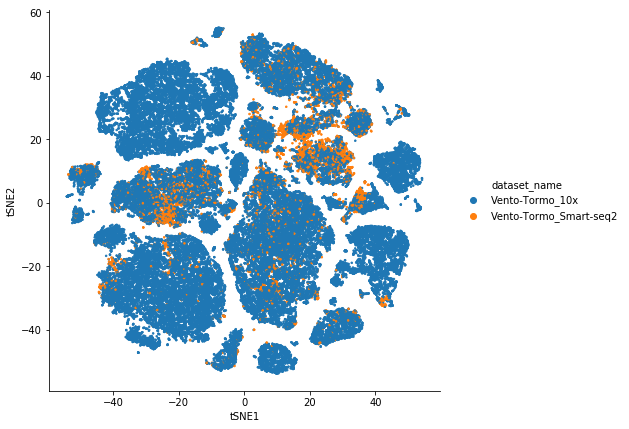

In [24]:
plot = human.visualize_latent("dataset_name")
plot.get_figure().savefig("ALIGNED_Homo_sapiens_Placenta/dataset_name.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


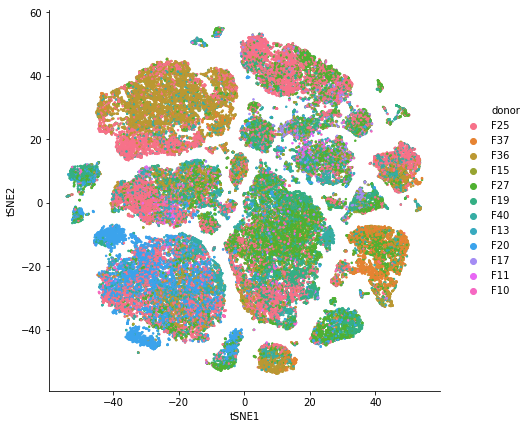

In [25]:
plot = human.visualize_latent("donor")
plot.get_figure().savefig("ALIGNED_Homo_sapiens_Placenta/donor.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


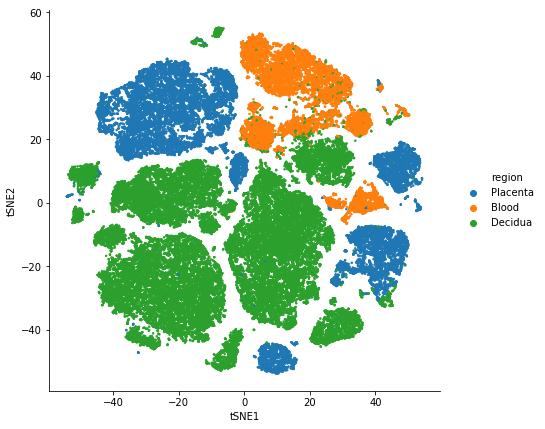

In [26]:
plot = human.visualize_latent("region")
plot.get_figure().savefig("ALIGNED_Homo_sapiens_Placenta/region.pdf", bbox_inches="tight")

In [27]:
%%capture capio
human_models = [human_model]
opt_model_kwargs = dict(
    batch_effect=["dataset_name", "donor"],
    #rmbatch_module=["MNNAdversarial", "Adversarial", "Adversarial", "Adversarial"],
    rmbatch_module_kwargs=dict(lambda_reg=0.01)
)  # Many batch effects are being aligned, decrease regularization strength accordingly
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    human_models.append(cb.directi.fit_DIRECTi(
        human, human.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/ALIGNED_Homo_sapiens_Placenta/model_%d" % i
    ))
human_blast = cb.blast.BLAST(human_models, human, keep_exprs=True).build_empirical()
human_blast.save("ALIGNED_Homo_sapiens_Placenta")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Homo_sapiens_Placenta/model_1/checkpoint-173
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Homo_sapiens_Placenta/model_2/checkpoint-49
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Homo_sapiens_Placenta/model_3/checkpoint-108


In [28]:
with open("ALIGNED_Homo_sapiens_Placenta/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("ALIGNED_Homo_sapiens_Placenta/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [29]:
utils.self_projection(human_blast, "ALIGNED_Homo_sapiens_Placenta")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...


/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:313: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Coverage = 0.9943
Accuracy = 0.9826
